In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/raw/Airbnb_Open_Data.csv")
df


C:\Users\frank\AppData\Local\Temp\ipykernel_5864\3728613060.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [86]:

# ejemplo del aspecto de las dos mitades que se usaran mas adelante
columns_half1 = ["price"]  # mitad 1
columns_half2 = ["price"]  # mitad 2

#definir mitades
half1, half2 = train_test_split(df, test_size=0.5, random_state=42)

# mostrar solo precios
half1 = half1[columns_half1]
half2 = half2[columns_half2]

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float) #linea para imprimir sin el "$" y mostrar columna con enteros
column = df['price']

# mostrar mitades
print("First Half:")
print(half1.head())
print("\nSecond Half:")
print(half2.head())



First Half:
        price
95887   358.0
53241   507.0
49885   861.0
13497    52.0
87407  1098.0

Second Half:
       price
48202  951.0
94193  543.0
90387  812.0
89198  328.0
8266   132.0


In [84]:
#importa la libreria numpy y pandas
#se usan areglos numpy porque es un objeto multidimensional que representa datos de mismo tipo
#importa counter que cuenta elementos en una lista

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

#crea una clase KNN que contendra el algoritmo
# en K se guardaran los vecinos que usara el algoritmo

class KNearestNeighbors:
    def __init__(self, k=5):
        self.k = k

#y_train y x_train contendran los datos unas vez entrenados 
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
#metodo predict que recibe datos de prueba y devuelve las predicciones
#np.array devuel las predicciones en arreglo numpy

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
#metodo llamado predict que predice el siguiente dato en x
#distances = np.linalg calcula la distancia entre X y la muestra X 
#en k_indices se seleccionan los k primeros
#most_common regresa la etiqueta mas comun encontrada

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

#pd.read cargamos el dataset de airbnb
#importante eliminar el simbolo "$" para no mostrarse como string y que sean float

df = pd.read_csv("../data/raw/Airbnb_Open_Data.csv")
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

#asignamos un precio objetivo como blanco
#el rango son los vecinos adyacentes

precio_objetivo = 400
rango = 10

#xcreacion de un df nuevo y filtrado en torno al precio objetivo
df_f = df[(df['price'] >= precio_objetivo - rango) & (df['price'] <= precio_objetivo + rango)]

#asignamos la columna "service fee" como blanco 

X = df_f[['price']].values 
y = df_f['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)

# guardamos las muestras en precioMAYOR y precioMENOR respecto a la naturaleza de esos datos
sample_X_test = X_test[:14]
sample_y_test = y_test[:14]

#impresion de los datos menores y mayores respecto al precio objetivo 
predictions = knn.predict(sample_X_test)
print("Predicciones:\n", predictions)



C:\Users\frank\AppData\Local\Temp\ipykernel_5864\1625213482.py:45: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/Airbnb_Open_Data.csv")


Predicciones:
 [400. 401. 397. 398. 392. 406. 408. 400. 392. 391. 390. 392. 399. 403.]


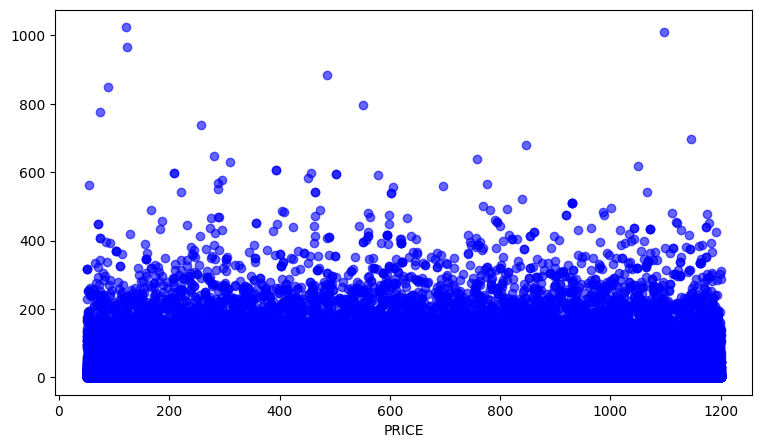

In [77]:
#guia de precios existentes para ajustar el precio objetivo
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(9, 5))

ax1.scatter(df["price"], df["number of reviews"], color='blue', alpha=0.6)
ax1.set_xlabel("PRICE")
ax1.tick_params(axis='y', labelcolor='black')
